In [3]:
import numpy as np
import math

# **Step 1: Implementing Gates, Activation Function and Loss Functions:**

## 1- Gates:

In [4]:
class Gate:
    def forward(self):
        raise NotImplementedError
    
    def backward(self):
        raise NotImplementedError
    
class AddGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x + y
    
    def backward(self, dz):
        dx = dz * np.ones_like(self.x)
        dy = dz * np.ones_like(self.y) 
        return dx, dy
    
class MultiplyGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x * y
    
    def backward(self, dz):
        dx = dz * self.y
        dy = dz * self.x
        
        return dx, dy
    
class SubtractGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x - y
    
    def backward(self, dz):
        dx = dz * np.ones_like(self.x)
        dy = - dz * np.ones_like(self.y) 
        return dx, dy
    
class DivideGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x / y
    
    def backward(self, dz):
        dx = dz / self.y
        dy = - dz * self.x / (np.power(self.y, 2))
        return dx, dy
    
class PowerGate(Gate):
    def forward(self, x, y): # Assuming that y is the power 
        self.x = x
        self.y = y
        return np.power(x, y)
    
    def backward(self, dz):
        dx = dz * self.y * np.power(self.x, self.y - 1)
        return dx, None
    
class MaxGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return np.maximum(x, y)
    
    def backward(self, dz):
        return dz * (self.x >= self.y), dz * (self.y > self.x)
    
class MinGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return np.minimum(x, y)
    
    def backward(self, dz):
        return dz * (self.x <= self.y), dz * (self.y < self.x)
    

# Unary inputs: Exponential, Sine, Cosine, Tan

class ExpGate(Gate):
    def forward(self, x):
        self.x = x
        return np.exp(x)
    
    def backward(self, dz):
        return dz * np.exp(self.x)
    
class SineGate(Gate):
    def forward(self, x):
        self.x = x
        return np.sin(x)
    
    def backward(self, dz):
        return dz * np.cos(self.x)
    
class CosineGate(Gate):
    def forward(self, x):
        self.x = x
        return np.cos(x)
    
    def backward(self, dz):
        return -dz * np.sin(self.x)
    
class TanGate(Gate):
    def forward(self, x):
        self.x = x
        return np.tan(x)
    
    def backward(self, dz):
        return dz * (1 / np.power(np.cos(self.x), 2))
    

## 2- Activation Functions:

In [5]:
class linear(Gate):
    def forward(self, x):
        self.x = x
        return x
    
    def backward(self, dz):
        return dz

class relu(Gate):
    def forward(self, x):
        self.x = x
        return np.maximum(0, x)
    
    def backward(self, dz):
        return dz if self.x > 0 else 0

class sigmoid(Gate):
    def forward(self, x):
        self.x = x
        return 1 / (1 + np.exp(-np.array(x)))
    
    def backward(self, dz):
        return dz * self.forward(self.x)(1 - self.forward(self.x))    

class softmax(Gate):
    def forward(self, x):
        self.x = x
        return np.exp(x) / np.sum(np.exp(x), axis = -1, keepdims = True)
    
    def backward(self, dz):
        return dz * self.forward(self.x) * (1 - self.forward(self.x))

class tanh(Gate):
    def forward(self, x):
        self.x = x
        return np.tanh(x)
    
    def backward(self, dz):
        return dz * (1 - np.tanh(self.x) * 2)

## 3- Loss Functions:

In [6]:
class binary_cross_entropy(Gate):
    def forward(self, y, y_hat):
        self.y = y
        self.y_hat = y_hat
        return - np.mean( y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    
    def backward(self, dz):
        return dz * (self.y_hat - self.y) / (self.y_hat * (1 - self.y_hat))
    
    
class l2_loss(Gate):
    def forward(self, y, y_hat):
        self.y = y
        self.y_hat = y_hat
        return 0.5 * np.mean(np.power(y - y_hat, 2))
    
    def backward(self, dz):
        return dz * (self.y_hat - self.y)

### Test cases:

In [7]:
x = 3
y = 4

print(f"x = {x}, y = {y}")

add_gate = AddGate()
output = add_gate.forward(x,y)
print("Add Gate = ", output)

multiply_gate = MultiplyGate()
output = multiply_gate.forward(x,y)
print("Multiply Gate = ", output)

subtract_gate = SubtractGate()
output = subtract_gate.forward(y,x)
print("Subtract Gate = ", output)

division_gate = DivideGate()
output = division_gate.forward(x,y)
print("Division Gate = ", output)

power_gate = PowerGate()
output = power_gate.forward(x,y)
print("Power Gate = ", output)

max_gate = MaxGate()
output = max_gate.forward(x,y)
print("Max Gate = ", output)

min_gate = MinGate()
output = min_gate.forward(x,y)
print("Min Gate = ", output)

exp_gate = ExpGate()
output = exp_gate.forward(x)
print("Exp Gate = ", output)

sine_gate = SineGate()
output = sine_gate.forward(x)
print("Sine Gate = ", output)

cosine_gate = CosineGate()
output = cosine_gate.forward(x)
print("Cosine Gate = ", output)

tan_gate = TanGate()
output = tan_gate.forward(x)
print("Tan Gate = ", output)

relu_function = relu()
output = relu_function.forward([-1, 2, 5, 0, -10, 6])
print("-> Relu of [-1, 2, 5, 0, -10, 6] = ", output)

sigmoid_function = sigmoid()
output = sigmoid_function.forward([-1, 2, 5, 0, -10, 6])
print("-> Sigmoid of [-1, 2, 5, 0, -10, 6] = ", output)

softmax_function = softmax()
output = softmax_function.forward([-1, 2, 5, 0, -10, 6])
print("-> Softmax of [-1, 2, 5, 0, -10, 6] = ", output)

tanh_function = tanh()
output = tanh_function.forward([-1, 2, 5, 0, -10, 6])
print("-> Tanh of [-1, 2, 5, 0, -10, 6] = ", output)

bce_loss = binary_cross_entropy()
result = bce_loss.forward(1, 0.8)
print("--> BCE loss = ", result)

mse_loss = l2_loss()
result = mse_loss.forward(1, 0.8)
print("--> L2 loss = ", result)


x = 3, y = 4
Add Gate =  7
Multiply Gate =  12
Subtract Gate =  1
Division Gate =  0.75
Power Gate =  81
Max Gate =  4
Min Gate =  3
Exp Gate =  20.085536923187668
Sine Gate =  0.1411200080598672
Cosine Gate =  -0.9899924966004454
Tan Gate =  -0.1425465430742778
-> Relu of [-1, 2, 5, 0, -10, 6] =  [0 2 5 0 0 6]
-> Sigmoid of [-1, 2, 5, 0, -10, 6] =  [2.68941421e-01 8.80797078e-01 9.93307149e-01 5.00000000e-01
 4.53978687e-05 9.97527377e-01]
-> Softmax of [-1, 2, 5, 0, -10, 6] =  [6.56225724e-04 1.31806460e-02 2.64740352e-01 1.78380646e-03
 8.09846881e-08 7.19638889e-01]
-> Tanh of [-1, 2, 5, 0, -10, 6] =  [-0.76159416  0.96402758  0.9999092   0.         -1.          0.99998771]
--> BCE loss =  0.2231435513142097
--> L2 loss =  0.01999999999999999


# **Step 2: Implementing Computational Graph / Model:**

## 1- Model:

In [8]:
import matplotlib.pyplot as plt

class Model:
    def __init__(self, layers_dim, activation_func, loss):
        self.layers_dim = layers_dim
        self.activation_func = activation_func
        self.loss = loss
        self.parameters = self.initialize_parameters()

    # intlizing parameters depending on activation function 
    def initialize_parameters(self):
        np.random.seed(42)
        parameters = {}
        for i in range(1, len(self.layers_dim)):
            if self.activation_func in ['sigmoid', 'tanh']:
                scale = np.sqrt(1 / self.layers_dim[i - 1])  # Xavier/Glorot initialization
            elif self.activation_func == 'relu':
                scale = np.sqrt(2 / self.layers_dim[i - 1])  # He initialization
            else:
                scale = 0.01  # Default initialization
            
            parameters[f'W{i}'] = np.random.randn(self.layers_dim[i], self.layers_dim[i - 1]) * scale
            parameters[f'b{i}'] = np.zeros((self.layers_dim[i], 1))
        return parameters
    
# It computes the linear transformation (weighted sum of inputs) for each layer and applies the corresponding activation function.
    def forward_probagation(self, X):
        A = X
        for i in range(1, len(self.layers_dim) - 1): #  Iterate over the layers of the neural network, excluding the input and output layers.
            Z = np.dot(self.parameters[f'W{i}'], A) + self.parameters[f'b{i}'] #linear transformation
            if self.activation_func[i-1] == "softmax":
                activation_function_f = softmax() 
                A = activation_function_f.forward(Z)
            elif self.activation_func[i - 1] == 'relu':
                activation_function_f = relu()
                A = activation_function_f.forward(Z)
            elif self.activation_func[i - 1] == 'sigmoid':
                activation_function_f = sigmoid()
                A = activation_function_f.forward(Z)
            elif self.activation_func[i - 1] == 'tanh':
                activation_function_f = tanh()
                A = activation_function_f.forward(Z)
            else:
                raise ValueError(f"Unknown activation function: {self.activation_func[i - 1]}")
            #point hena ym3l3

        Z_output = np.dot(self.parameters[f'W{len(self.layers_dim) - 1}'], A) + self.parameters[f'b{len(self.layers_dim) - 1}']
        activation_output = softmax()
        A_output = activation_output.forward(Z_output) # predicted probabilities for each class
                                                       # Assuming output layer uses softmax activation
        

        return A_output
    def backward_probagation(self, X, Y, A_output):
     num_of_training_EX = X.shape[1]
     gradients = {}  
     dAL = self.loss.forward(A_output, Y)   
     dAL = self.loss.backward(1)   #derivative of the loss function with respect to the output of the neural network.
     dZ_output = dAL  
     for i in range(len(self.layers_dim) - 2, 0, -1):
        dA = np.dot(self.parameters[f'W{i+1}'].T, dZ_output) #computing the derivative of the activations of the current layer with respect to the linear output of the next layer 
        Z = np.dot(self.parameters[f'W{i}'], X) + self.parameters[f'b{i}']
         # hena ym3lm
        if self.activation_func[i-1] == 'linear':
            activation_function = linear()
        elif self.activation_func[i-1] == 'relu':
            activation_function = relu()
        elif self.activation_func[i-1] == 'sigmoid':
            activation_function = sigmoid()
        elif self.activation_func[i-1] == 'softmax': 
            activation_function = softmax()
        elif self.activation_func[i-1] == 'tanh':
            activation_function = tanh()
            
        A = activation_function.forward(Z)
        dZ = activation_function.backward(dA)
        gradients[f'dW{i}'] = np.dot(dZ, X.T) / num_of_training_EX
        gradients[f'db{i}'] = np.sum(dZ, axis=1, keepdims=True) / num_of_training_EX
        dZ_output = dZ
     return gradients

    def update_parameters(self, gradients, learning_rate):
     for i in range(1, len(self.layers_dim) - 1):  
        self.parameters[f'W{i}'] -= learning_rate * gradients[f'dW{i}']
        self.parameters[f'b{i}'] -= learning_rate * gradients[f'db{i}']

    def train(self, X, Y, Label, learning_rate, num_epochs, gradient_descent_method='batch',
          batch_size=None, dropout_prob=None, l1_lambda=None, early_stopping=False,
          validation_data=None, patience=10):
     losses = []

     for epoch in range(num_epochs):

        if gradient_descent_method == 'stochastic':
            num_samples = X.shape[1]
            for i in range(num_samples):
                sample_X = X[:, i:i+1]
                sample_y = Y[:, i:i+1]
                A_output = self.forward_probagation(sample_X)
                loss = self.loss.forward(A_output, sample_y)
                gradients = self.backward_probagation(sample_X, sample_y, A_output)
                self.update_parameters(gradients, learning_rate)
        if gradient_descent_method == 'batch':
            A_output = self.forward_probagation(X)
            loss = self.loss.forward(A_output, Y)
            gradients = self.backward_probagation(X, Y, A_output)
            self.update_parameters(gradients, learning_rate)

        elif gradient_descent_method == 'mini_batch':
            if batch_size is None:
                raise ValueError("Batch size must be specified for mini-batch gradient descent.")
            for i in range(0, X.shape[1], batch_size):
                mini_batch_X = X[:, i:i+batch_size]
                mini_batch_y = Y[:, i:i+batch_size]
                A_output = self.forward_probagation(mini_batch_X)
                loss = self.loss.forward(A_output, mini_batch_y)
                gradients = self.backward_probagation(mini_batch_X, mini_batch_y, A_output)
                self.update_parameters(gradients, learning_rate)

        losses.append(loss)

        if epoch % 100 == 0:
            print(f"epoch {epoch}, Loss: {loss}")  
    # Plot the loss curve
     plt.plot(range(num_epochs), losses, label=gradient_descent_method)
     plt.xlabel('epoch')
     plt.ylabel('Loss')
     plt.title(f'Loss Curve - {gradient_descent_method}')
     plt.legend()
     plt.show()

     
    def predict(self, X):
        return self.forward_probagation(X)


## Test Case 1: Training with Stochastic Gradient Descent

Epoch 0, Loss: 1.6068280847669294
Epoch 100, Loss: 1.6068280847669294
Epoch 200, Loss: 1.6068280847669294
Epoch 300, Loss: 1.6068280847669294
Epoch 400, Loss: 1.6068280847669294
Epoch 500, Loss: 1.6068280847669294
Epoch 600, Loss: 1.6068280847669294
Epoch 700, Loss: 1.6068280847669294
Epoch 800, Loss: 1.6068280847669294
Epoch 900, Loss: 1.6068280847669294


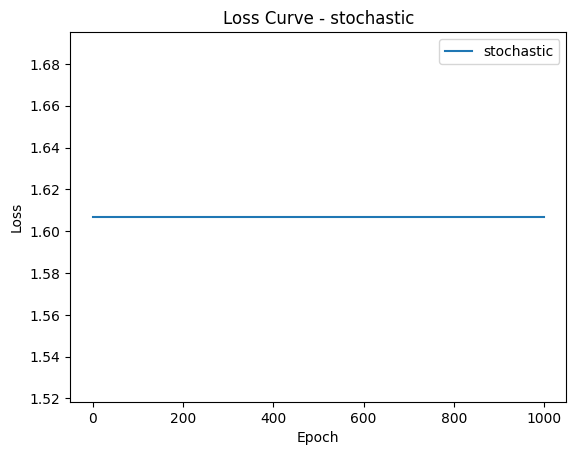

In [11]:
# Define layers dimensions, activation functions, and loss
layers_dim = [10, 128, 2]
activation_func = ["tanh", "relu", "softmax"]
loss = l2_loss()


# Generate random training data
X_train = np.random.randn(10, 1000)
Y_train = np.random.randn(2, 1000)

# Create a model instance
model = Model(layers_dim, activation_func, loss)

# Train the model using stochastic gradient descent
model.train(X_train, Y_train, Label=None, learning_rate=0.01, num_epochs=1000, gradient_descent_method='stochastic')

# Plot the learning curve


# Test Case 2: Training with Mini-Batch Gradient Descent

Epoch 0, Loss: 0.42942077843189336
Epoch 100, Loss: 0.4294097222685986
Epoch 200, Loss: 0.4293970522794873
Epoch 300, Loss: 0.4293825489371078
Epoch 400, Loss: 0.4293662637296647
Epoch 500, Loss: 0.4293485706601
Epoch 600, Loss: 0.42933004065942504
Epoch 700, Loss: 0.42931124694001355
Epoch 800, Loss: 0.4292926542423812
Epoch 900, Loss: 0.4292746053651295


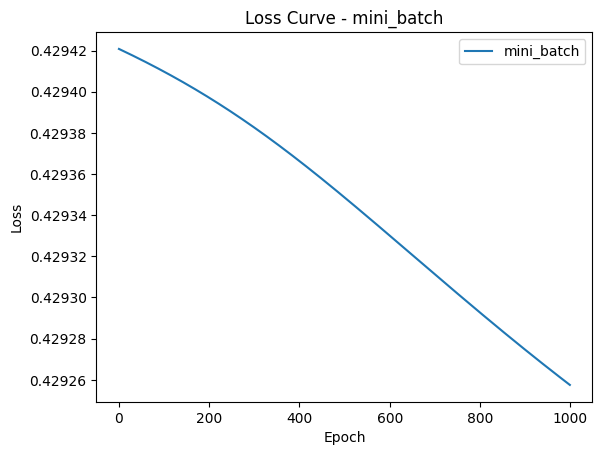

In [12]:
# Test Case 3: Training with Mini-Batch Gradient Descent

# Create a model instance
model = Model(layers_dim, activation_func, loss)

# Train the model using mini-batch gradient descent
model.train(X_train, Y_train, Label=None, learning_rate=0.01, num_epochs=1000, gradient_descent_method='mini_batch', batch_size=64)

# Plot the learning curve


In [ ]:
from itertools import product

class HyperparameterTuner:
    def __init__(self, model_class, hyperparameters_grid, X_train, y_train, X_val, y_val, num_epochs=5):
        self.model_class = model_class
        self.hyperparameters_grid = hyperparameters_grid
        self.X_train, self.y_train = X_train, y_train
        self.X_val, self.y_val = X_val, y_val
        self.num_epochs = num_epochs

    def grid_search(self):
        best_model = None
        best_val_loss = float('inf')

        for hyperparameters in product(*self.hyperparameters_grid.values()):
            model = self.model_class(*hyperparameters)
            model.train(self.X_train, self.y_train, num_epochs=self.num_epochs, learning_rate=0.01)

            val_output = model.predict(self.X_val)
            val_loss = model.loss(self.y_val, val_output)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model = model

        return best_model


## Training with Full data set 

In [14]:
class ActivationFunction:
    @staticmethod
    def relu(z):
        return np.maximum(0, z)

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def softmax(z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    

In [15]:

class BinaryCrossEntropyLoss(Gate):
    def forward(self, y, y_hat):
        self.y = y
        self.y_hat = y_hat
        return - np.mean( y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    
    def backward(self, y_pred, y_true):
        # Implement binary cross-entropy backward pass
        return (y_pred - y_true) / (y_pred * (1 - y_pred))

class L2Loss(Gate):
    def forward(self, y, y_hat):
        self.y = y
        self.y_hat = y_hat
        return 0.5 * np.mean(np.power(y - y_hat, 2))
    
    def backward(self, A_output, y_true):
        # Ensure A_output and y_true have the same shape
        A_output = A_output.reshape(y_true.shape)

        # Implement L2 loss backward pass
        return A_output - y_true


In [19]:
import matplotlib.pyplot as plt
class Model:
    def __init__(self, layers_dim, activation_func, loss):
        self.layers_dim = layers_dim
        self.activation_func = activation_func
        self.loss = loss
        self.params = self.initialize_parameters()

    def initialize_parameters(self):
        np.random.seed(42)
        params = {}
        for i in range(1, len(self.layers_dim)):
            params[f'W{i}'] = np.random.randn(self.layers_dim[i], self.layers_dim[i-1]) * 0.01
            params[f'b{i}'] = np.zeros((self.layers_dim[i], 1))
        return params

    def forward(self, X):
        A = X
        for i in range(1, len(self.layers_dim) - 1):
            Z = np.dot(self.params[f'W{i}'], A) + self.params[f'b{i}']
            A = self.activation_func.softmax(Z)

        Z_output = np.dot(self.params[f'W{len(self.layers_dim) - 1}'], A) + self.params[f'b{len(self.layers_dim) - 1}']
        A_output = self.activation_func.softmax(Z_output)

        return A_output
    def backward(self, X, Y, A_output):
     m = X.shape[1]
     grads = {}
     dA_output = self.loss.backward(A_output, Y)
     dZ_output = dA_output  # Assuming softmax and L2Loss
     for i in range(len(self.layers_dim) - 2, 0, -1):
        dA = np.dot(self.params[f'W{i+1}'].T, dZ_output)
        Z = np.dot(self.params[f'W{i}'], X) + self.params[f'b{i}']
        A = self.activation_func.softmax(Z)
        dZ = dA * A * (1 - A)
        grads[f'dW{i}'] = np.dot(dZ, X.T) / m
        grads[f'db{i}'] = np.sum(dZ, axis=1, keepdims=True) / m
        dZ_output = dZ
     return grads

    def update_parameters(self, grads, learning_rate):
     for i in range(1, len(self.layers_dim) - 1):  # Fix the loop range
        self.params[f'W{i}'] -= learning_rate * grads[f'dW{i}']
        self.params[f'b{i}'] -= learning_rate * grads[f'db{i}']


    import matplotlib.pyplot as plt



    def train(self, X, Y, player_names, learning_rate, num_epochs, gradient_descent_method='batch',
          batch_size=None, dropout_prob=None, l1_lambda=None, early_stopping=False,
          validation_data=None, patience=10):
     losses = []

     for epoch in range(num_epochs):
        if gradient_descent_method == 'batch':
            A_output = self.forward(X)
            loss = self.loss.forward(A_output, Y)
            grads = self.backward(X, Y, A_output)
            self.update_parameters(grads, learning_rate)

        elif gradient_descent_method == 'stochastic':
            for i in range(X.shape[1]):
                sample_X = X[:, i:i+1]
                sample_y = Y[:, i:i+1]
                A_output = self.forward(sample_X)
                loss = self.loss.forward(A_output, sample_y)
                grads = self.backward(sample_X, sample_y, A_output)
                self.update_parameters(grads, learning_rate)

        elif gradient_descent_method == 'mini_batch':
            if batch_size is None:
                raise ValueError("Batch size must be specified for mini-batch gradient descent.")
            for i in range(0, X.shape[1], batch_size):
                mini_batch_X = X[:, i:i+batch_size]
                mini_batch_y = Y[:, i:i+batch_size]
                A_output = self.forward(mini_batch_X)
                loss = self.loss.forward(A_output, mini_batch_y)
                grads = self.backward(mini_batch_X, mini_batch_y, A_output)
                self.update_parameters(grads, learning_rate)

        losses.append(loss)

        if epoch % 100 == 0:
            print(f"epoch:{epoch}, Loss: {loss}")

            
        

            
    # Plot the loss curve
     plt.plot(range(num_epochs), losses, label=gradient_descent_method)
     plt.xlabel('epoch')
     plt.ylabel('Loss')
     plt.title(f'Loss Curve - {gradient_descent_method}')
     plt.legend()
     plt.show()

     
    def predict(self, X):
        return self.forward(X)


epoch:0, Loss: 0.031236670972338954
epoch:100, Loss: 0.03123667097233633
epoch:200, Loss: 0.03123667097233372
epoch:300, Loss: 0.031236670972331095
epoch:400, Loss: 0.031236670972328486
epoch:500, Loss: 0.03123667097232587
epoch:600, Loss: 0.031236670972323258
epoch:700, Loss: 0.031236670972320635
epoch:800, Loss: 0.031236670972318026
epoch:900, Loss: 0.031236670972315406
epoch:1000, Loss: 0.031236670972312797
epoch:1100, Loss: 0.031236670972310174
epoch:1200, Loss: 0.031236670972307562
epoch:1300, Loss: 0.03123667097230494
epoch:1400, Loss: 0.03123667097230233
epoch:1500, Loss: 0.03123667097229971
epoch:1600, Loss: 0.031236670972297095
epoch:1700, Loss: 0.03123667097229448
epoch:1800, Loss: 0.031236670972291866
epoch:1900, Loss: 0.03123667097228925
epoch:2000, Loss: 0.031236670972286634
epoch:2100, Loss: 0.031236670972284022
epoch:2200, Loss: 0.0312366709722814
epoch:2300, Loss: 0.031236670972278783
epoch:2400, Loss: 0.03123667097227617
epoch:2500, Loss: 0.03123667097227356
epoch:2600

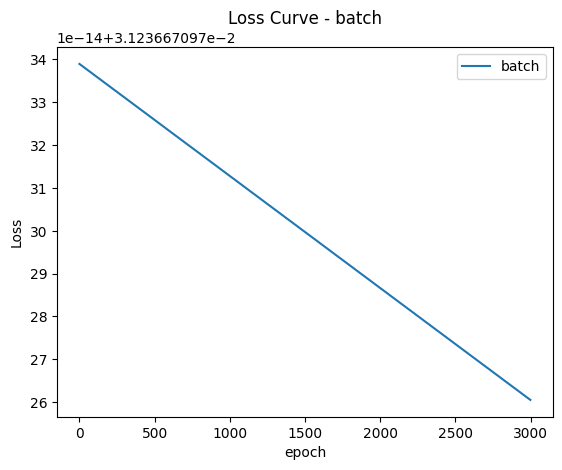

epoch:0, Loss: 0.46875
epoch:100, Loss: 0.46875
epoch:200, Loss: 0.46875
epoch:300, Loss: 0.46875
epoch:400, Loss: 0.46875
epoch:500, Loss: 0.46875
epoch:600, Loss: 0.46875
epoch:700, Loss: 0.46875
epoch:800, Loss: 0.46875
epoch:900, Loss: 0.46875
epoch:1000, Loss: 0.46875
epoch:1100, Loss: 0.46875
epoch:1200, Loss: 0.46875
epoch:1300, Loss: 0.46875
epoch:1400, Loss: 0.46875
epoch:1500, Loss: 0.46875
epoch:1600, Loss: 0.46875
epoch:1700, Loss: 0.46875
epoch:1800, Loss: 0.46875
epoch:1900, Loss: 0.46875
epoch:2000, Loss: 0.46875
epoch:2100, Loss: 0.46875
epoch:2200, Loss: 0.46875
epoch:2300, Loss: 0.46875
epoch:2400, Loss: 0.46875
epoch:2500, Loss: 0.46875
epoch:2600, Loss: 0.46875
epoch:2700, Loss: 0.46875
epoch:2800, Loss: 0.46875
epoch:2900, Loss: 0.46875


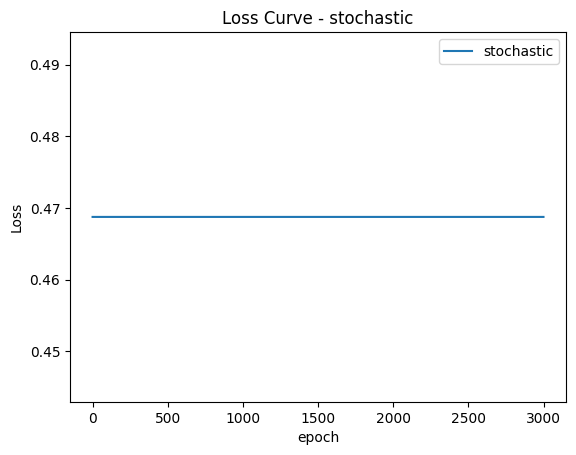

epoch:0, Loss: 0.030478638616518165
epoch:100, Loss: 0.03046694342165672
epoch:200, Loss: 0.030455277859130887
epoch:300, Loss: 0.03044364427483337
epoch:400, Loss: 0.030432048523248028
epoch:500, Loss: 0.030420502104852833
epoch:600, Loss: 0.03040902352059776
epoch:700, Loss: 0.03039763868572694
epoch:800, Loss: 0.0303863802635293
epoch:900, Loss: 0.03037528590843365
epoch:1000, Loss: 0.0303643956281632
epoch:1100, Loss: 0.030353748705499086
epoch:1200, Loss: 0.030343380750248523
epoch:1300, Loss: 0.030333321402250313
epoch:1400, Loss: 0.030323592987181347
epoch:1500, Loss: 0.0303142101418183
epoch:1600, Loss: 0.030305180204616502
epoch:1700, Loss: 0.030296504083017137
epoch:1800, Loss: 0.03028817734271098
epoch:1900, Loss: 0.030280191347644703
epoch:2000, Loss: 0.030272534353804805
epoch:2100, Loss: 0.030265192503085785
epoch:2200, Loss: 0.03025815068270539
epoch:2300, Loss: 0.030251393225674012
epoch:2400, Loss: 0.030244904439055934
epoch:2500, Loss: 0.030238668961968085
epoch:2600,

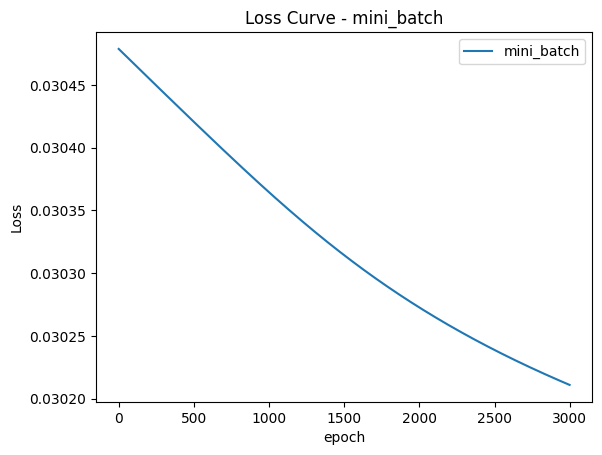

 Actual Position: CAM, Model Predicted Position: ST,Player Name: Mohamed Salah,
 Actual Position: RW, Model Predicted Position: ST,Player Name: Ousmane Dembélé,
 Actual Position: CB, Model Predicted Position: CB,Player Name: Raphaël Varane,
 Actual Position: LW, Model Predicted Position: ST,Player Name: Cristiano Ronaldo,
 Actual Position: CF, Model Predicted Position: ST,Player Name: Lionel Messi,
 Actual Position: ST, Model Predicted Position: ST,Player Name: Robert Lewandowski,
 Actual Position: CAM, Model Predicted Position: CAM,Player Name: Pelé,
 Actual Position: CAM, Model Predicted Position: ST,Player Name: Neymar Jr,
 Actual Position: ST, Model Predicted Position: ST,Player Name: Wissam Ben Yedder,
 Actual Position: LW, Model Predicted Position: CAM,Player Name: Abedi Pelé,
 Actual Position: ST, Model Predicted Position: ST,Player Name: David Ginola,
 Actual Position: CAM, Model Predicted Position: CM,Player Name: N'Golo Kanté,
 Actual Position: LW, Model Predicted Position: S

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV data
data = pd.read_csv("Fifa22.csv", encoding='utf-8')

# Encode categorical variables
le = LabelEncoder()
data['Position'] = le.fit_transform(data['Position'])

# Split the dataset 
X = data.drop(['Position', 'Nombre'], axis=1).values.T
Y = data['Position'].values
player_names = data['Nombre'].values

# Standardize the features 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the target labels
num_classes = len(le.classes_)
Y_one_hot = np.eye(num_classes)[Y]

Y = Y.astype(int)  # Convert target labels to integers
layers_dim = [X.shape[0], 128, num_classes]  # Adjust num_classes based on your number of positions
print(len(layers_dim))
activation_func = ["tanh","relu","softmax"]
loss = l2_loss()

model = Model(layers_dim, activation_func, loss)

# Train and print predicted positions for each method
model.train(X, Y_one_hot.T, player_names, num_epochs=3000, learning_rate=0.01,
            gradient_descent_method='batch', batch_size=None,
            dropout_prob=None, l1_lambda=0.01, early_stopping=False, validation_data=None, patience=10)

model.train(X, Y_one_hot.T, player_names, num_epochs=3000, learning_rate=0.01,
            gradient_descent_method='stochastic', batch_size=None,
            dropout_prob=None, l1_lambda=0.01, early_stopping=False, validation_data=None, patience=10)

# Initialize losses list outside the loop
losses = []

model.train(X, Y_one_hot.T, player_names, num_epochs=3000, learning_rate=0.01,
            gradient_descent_method='mini_batch', batch_size=32,
            dropout_prob=None, l1_lambda=0.01, early_stopping=False, validation_data=None, patience=10)

# Extracting actual labels from one-hot encoded matrix
actual_labels = np.argmax(Y_one_hot.T, axis=0)

# Use the label_encoder to transform the labels back to the original positions
actual_positions = label_encoder.inverse_transform(actual_labels)
predicted_labels = np.argmax(model.predict(X), axis=0)

# Use the label_encoder to transform the predicted labels back to the original positions
predicted_positions = label_encoder.inverse_transform(predicted_labels)

# Print player names along with actual and predicted positions
for i in range(len(player_names)):
    print(f" Actual Position: {actual_positions[i]}, Model Predicted Position: {predicted_positions[i]},Player Name: {player_names[i]},")


In [22]:
def custom_accuracy(actual_positions, predicted_positions):
    correct = 0
    total = len(actual_positions)
    
    for actual, predicted in zip(actual_positions, predicted_positions):
        if actual == predicted or \
           (actual == 'CAM' and predicted in ['ST', 'CM', 'LW', 'RW']) or \
           (actual == 'LM' and predicted in ['RM', 'ST', 'RW', 'LW']) or \
           (actual == 'RM' and predicted in ['LM', 'ST', 'RW', 'LW']) or \
           (actual == 'LW' and predicted in ['LM', 'ST', 'RW', 'RM']) or \
           (actual == 'RW' and predicted in ['LM', 'ST', 'RM', 'LW']):
            correct += 1
    
    accuracy = correct / total
    return accuracy * 100

# Calculate and print custom accuracy
custom_acc = custom_accuracy(actual_positions, predicted_positions)
print(f"Custom Accuracy: {custom_acc:.2f}%")


Custom Accuracy: 66.89%


## calculating the aquracy 

<h2 style='color:Red' align='center'>Implementation of stochastic,Batch and Mini-Batch grandient descent in python</h2>

<a name="toc_40291_2.1"></a>
## Gradient descent summary
developing a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

**Compute_Cost**

In [9]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost


*gradient descent* as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$



In [10]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

def compute_gradient(x, y, w, b): 
     
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

***Batch Gradient Descent***

In [11]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 


    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [12]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


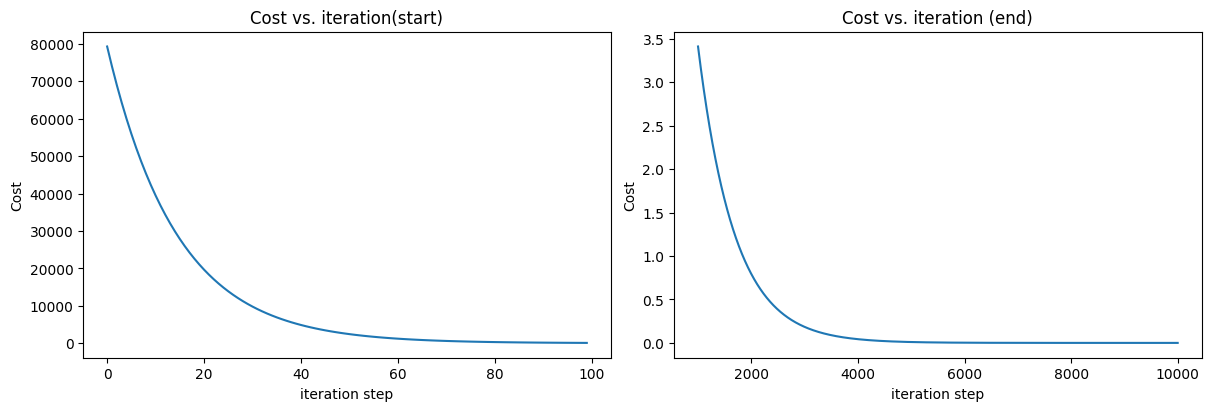

In [13]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

In [13]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

x = sx.fit_transform(df.drop('price',axis='columns'))
y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [14]:
y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [16]:
y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

**Vectorized Implementation**

In [24]:
def batch_gradient_descent(x,y,epochs,alpha=0.01):
    number_of_features = x.shape[1] 
    total_samples= x.shape[0]
    
    w=np.ones(shape=(number_of_features))
    b =0 
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        y_predicted = np.dot(w, x.T) + b
        
        w_grad = -(2/total_samples)*(x.T.dot(y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y-y_predicted)
        
        w= w-alpha*w_grad
        b= b-alpha*b_grad
        MSE_cost= np.mean(np.square(y-y_predicted))
        if i%10 ==0 :
            cost_list.append(MSE_cost)
            epoch_list.append(i)
    return w,b,MSE_cost,cost_list,epoch_list
       
        

In [25]:
w,b,MSE_cost,cost_list_batch,epoch_list_batch=batch_gradient_descent(x,y.reshape(y.shape[0],),500)
w,b,MSE_cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

<h2 style='color:Blue' align='center'>Batch Gradient Descent Plot</h2>

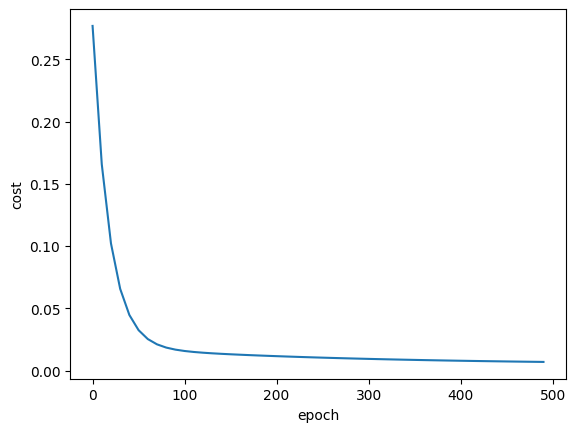

In [26]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_batch,cost_list_batch)

In [37]:
import random
def stochastic_gradient_descent(x, y, epochs, learning_rate = 0.01):
 
    number_of_features = x.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = x[random_index]
        sample_y = y[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [38]:
w,b,MSE_cost,cost_list_sgd,epoch_list_sgd=stochastic_gradient_descent(x,y.reshape(y.shape[0],),10000)
w,b,MSE_cost

(array([0.70791867, 0.67517843]), -0.23082387391872083, 0.006579052687978463)

<h2 style='color:yellow' align='center'>Stochastic Gradient Descent Plot</h2>

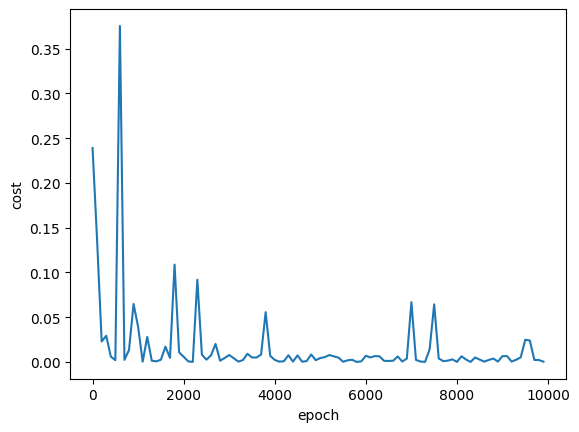

In [39]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [40]:
def mini_batch_gradient_descent(X, y, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [41]:
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
   x,
    y.reshape(y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71010753, 0.67811719]), -0.23359810416579307, 0.001886059176910753)

<h2 style='color:purple' align='center'>Mini Batch Gradient Descent Plot</h2>

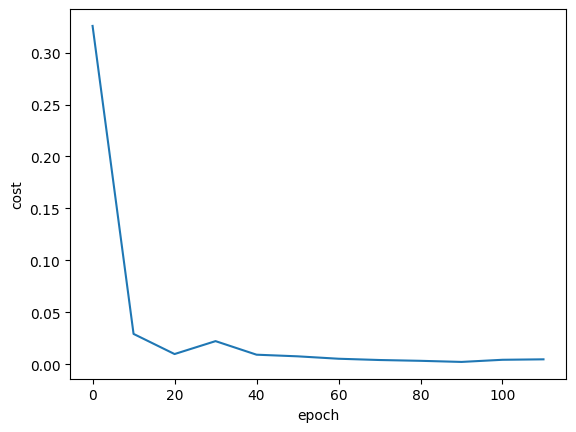

In [42]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

<h2 style='color:navy' align='center'>Early Stopping from Scratch</h2>

In [43]:
import copy


class EarlyStopping:
    def __init__(self, patience=5, min_delta=0, restore_best_weights=True):
        # number of epochs to wait for improvement before stopping the training.
        self.patience = patience
        # Minimum change in the monitored quantity validation loss to be considered as an improvement.
        self.min_delta = min_delta
        #A boolean flag indicating whether to restore the model's weights to the best observed during training when early stopping is triggered.
        self.restore_best_weights = restore_best_weights
        self.best_model = None
        self.best_loss = None
        self.counter = 0
        self.status = ""

    def __call__(self, model, val_loss):
        #1- Initialization Check:
        if self.best_loss is None:
            #it means that this is the first time the method is being called. In this case, it initializes self.best_loss with the current val_loss
            self.best_loss = val_loss
            #it deep copies the state of the model (model.state_dict()) into self.best_model.
            self.best_model = copy.deepcopy(model.state_dict())
            
        #2- Improvement Check:
        elif self.best_loss - val_loss >= self.min_delta:
            #Indicates an improvement in validation loss greater than or equal to the minimum delta required for considering it as an improvement. 
            self.best_model = copy.deepcopy(model.state_dict())
            self.best_loss = val_loss
            #Resets the counter to 0, and updates the status message.
            self.counter = 0
            self.status = f"Improvement found, counter reset to {self.counter}"
        #3- No Improvement:

        else:
            #ncrements the self.counter to indicate another epoch without improvement.
            self.counter += 1
            
            self.status = f"No improvement in the last {self.counter} epochs"
            if self.counter >= self.patience:
                #If the counter reaches or exceeds the patience threshold (self.patience), it triggers early stopping.
                self.status = f"Early stopping triggered after {self.counter} epochs."
                if self.restore_best_weights:
                    #if self.restore_best_weights is True, it loads the best model weights (self.best_model) back to the model.
                    model.load_state_dict(self.best_model)
                return True #Indicating that early stopping has been triggered.
        return False

<h2 style='color:maroon' align='center'>Implementing Drop out Layer from Scratch</h2>

<div style="text-align:center">
<img title="a title" alt="Batch Normalization" src="0_EY8R7nS10y5kQzOx.png" width="600">
</div>

In [44]:
import numpy as np

class Dropout():
    def __init__(self, p):
        self.mask = None
        self.p = p
    
    def __call__(self, X, mode):
        return self.forward(X, mode)
    
    def forward(self, X, mode):
        if mode == 'train':
            self.mask = np.random.binomial(1, self.p, x.shape)
        #np.random.binomial is a NumPy function that generates random numbers from a binomial distribution.
        #The first argument 1 specifies that each element in the output will be either 0 or 1 (success or failure).
        #The second argument self.p represents the probability of success for each trial (the probability of keeping a neuron active during dropout).
        #The third argument x.shape determines the shape of the output array, which is the same shape as the input X.
        #This line generates a binary mask where each element has a value of 1 with probability self.p and 0 with probability (1 - self.p).
        
            self.mask = np.true_divide(self.mask, self.p)
        #p.true_divide is a NumPy function that performs element-wise division.
        #This line scales the mask by dividing each element by self.p.
        #Scaling by self.p ensures that the expected value of the output remains the same, effectively compensating for the dropout effect during the forward pass.
            out =  self.mask * X
        else:
            out = X
     
        return out
    
    def backward(self, d_out):
        return d_out * self.mask
        #This ensures that only the active neurons (those that weren't zeroed out during the forward pass) contribute to the gradients.

<h2 style='color:aqua' align='center'>Implementing L1- Regularization from Scratch</h2>

In [47]:
# creating a class for Lasso Regression(L1-Regularization)

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.upadte_weights()


  # function for updating the weight & bias value
  def upadte_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

    


  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b



In [ ]:
class L1Regularization:
    def __init__(self, alpha):
        self.alpha = alpha

    def apply(self, weights):
        return self.alpha * np.sum(np.abs(weights))

# **Bonus Part Implementation:**

## Learning Rate Scheduler:

##### ***Exponential Decay:***
The following formula was used as reference from Stanford University slides. The hyperparameter `k` was set to 0.1 by default.

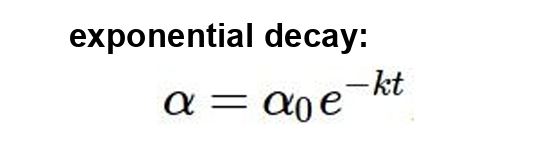

Plotting the exponential decay of the learning for 100 epochs

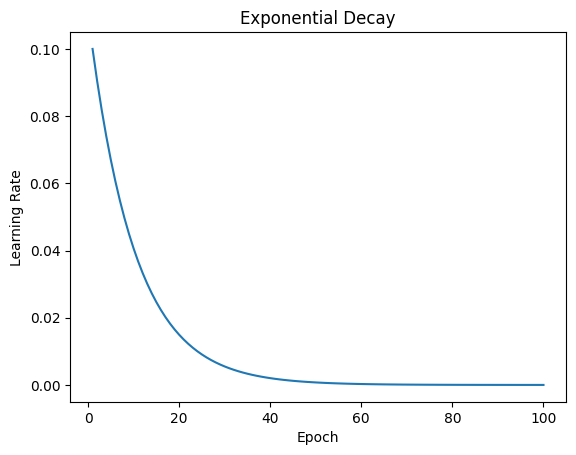

##### ***Step Decay:***
Used to drop the learning rate by a factor every few epochs.

Plotting the step decay of the learning for 100 epochs

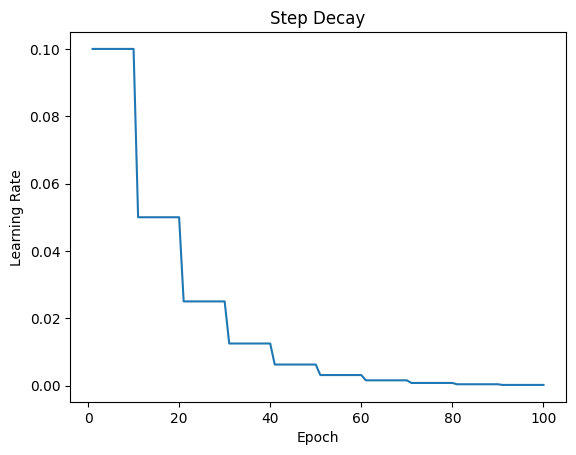

##### ***1/t Decay:***
This implementation was also referenced from Standford University slides. This formula is as given:

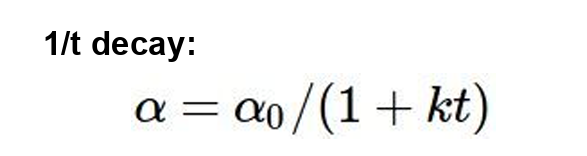

Plotting the 1/t decay of the learning for 100 epochs. It was noted that the output curve is similar to the exponential decay

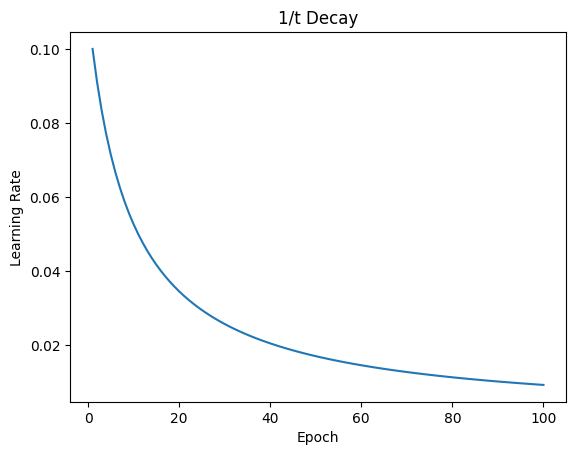

> Note: the test and plotting implementations are mentioned below in *Test* section

### Code:

In [ ]:
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    x,
    y,
    epochs = 120,
    batch_size = 5
)
w, b, cost
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)
class learning_rate_scheduler():
    def __init__(self):
        self.learning_rate = 0.1
        self.decay_steps = 10000
        self.drop_rate = 0.5
        self.epochs_drop_after = 10
        self.k = 0.1
        
    # def exp_decay(self, epoch):
    #     return self.learning_rate * self.decay_rate ** (epoch / self.decay_steps)
    
    def exponential_decay(self, epoch):
        return self.learning_rate * math.exp(- self.k * epoch)
    
    def step_decay(self, epoch):
        return self.learning_rate * math.pow(self.drop_rate,  (epoch // self.epochs_drop_after))
    
    # def adaptive_learning_rate(self, epoch):
    #     if epoch < 5:
    #         return self.learning_rate
    #     elif epoch < 10:
    #         return self.learning_rate / 2
    #     else:
    #         return self.learning_rate / 10
    
    def t_decay(self, epoch):
        return self.learning_rate / (1 + self.k * epoch)

### Test:

Epoch: 1, Learning Rate: 0.1
Epoch: 2, Learning Rate: 0.09048374180359596
Epoch: 3, Learning Rate: 0.0818730753077982
Epoch: 4, Learning Rate: 0.0740818220681718
Epoch: 5, Learning Rate: 0.06703200460356394
Epoch: 6, Learning Rate: 0.06065306597126335
Epoch: 7, Learning Rate: 0.05488116360940264
Epoch: 8, Learning Rate: 0.04965853037914095
Epoch: 9, Learning Rate: 0.044932896411722156
Epoch: 10, Learning Rate: 0.04065696597405991
Epoch: 11, Learning Rate: 0.036787944117144235
Epoch: 12, Learning Rate: 0.03328710836980796
Epoch: 13, Learning Rate: 0.030119421191220203
Epoch: 14, Learning Rate: 0.02725317930340126
Epoch: 15, Learning Rate: 0.024659696394160643
Epoch: 16, Learning Rate: 0.022313016014842982
Epoch: 17, Learning Rate: 0.02018965179946554
Epoch: 18, Learning Rate: 0.018268352405273462
Epoch: 19, Learning Rate: 0.016529888822158653
Epoch: 20, Learning Rate: 0.014956861922263504
Epoch: 21, Learning Rate: 0.013533528323661271
Epoch: 22, Learning Rate: 0.012245642825298192
Epoch

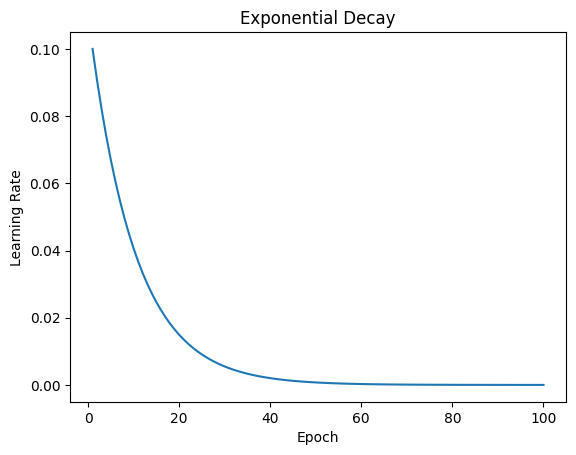

In [ ]:
import matplotlib.pyplot as plt 

lr_scheduler = learning_rate_scheduler()
num_epochs = 100
learning_rates = []

for epoch in range(num_epochs):
    new_learning_rate = lr_scheduler.exponential_decay(epoch)
    print(f"Epoch: {epoch+1}, Learning Rate: {new_learning_rate}")
    
    learning_rates.append(new_learning_rate)
    
plt.plot(range(1, num_epochs + 1), learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Exponential Decay')
plt.show()

Epoch: 1, Learning Rate: 0.1
Epoch: 2, Learning Rate: 0.1
Epoch: 3, Learning Rate: 0.1
Epoch: 4, Learning Rate: 0.1
Epoch: 5, Learning Rate: 0.1
Epoch: 6, Learning Rate: 0.1
Epoch: 7, Learning Rate: 0.1
Epoch: 8, Learning Rate: 0.1
Epoch: 9, Learning Rate: 0.1
Epoch: 10, Learning Rate: 0.1
Epoch: 11, Learning Rate: 0.05
Epoch: 12, Learning Rate: 0.05
Epoch: 13, Learning Rate: 0.05
Epoch: 14, Learning Rate: 0.05
Epoch: 15, Learning Rate: 0.05
Epoch: 16, Learning Rate: 0.05
Epoch: 17, Learning Rate: 0.05
Epoch: 18, Learning Rate: 0.05
Epoch: 19, Learning Rate: 0.05
Epoch: 20, Learning Rate: 0.05
Epoch: 21, Learning Rate: 0.025
Epoch: 22, Learning Rate: 0.025
Epoch: 23, Learning Rate: 0.025
Epoch: 24, Learning Rate: 0.025
Epoch: 25, Learning Rate: 0.025
Epoch: 26, Learning Rate: 0.025
Epoch: 27, Learning Rate: 0.025
Epoch: 28, Learning Rate: 0.025
Epoch: 29, Learning Rate: 0.025
Epoch: 30, Learning Rate: 0.025
Epoch: 31, Learning Rate: 0.0125
Epoch: 32, Learning Rate: 0.0125
Epoch: 33, Le

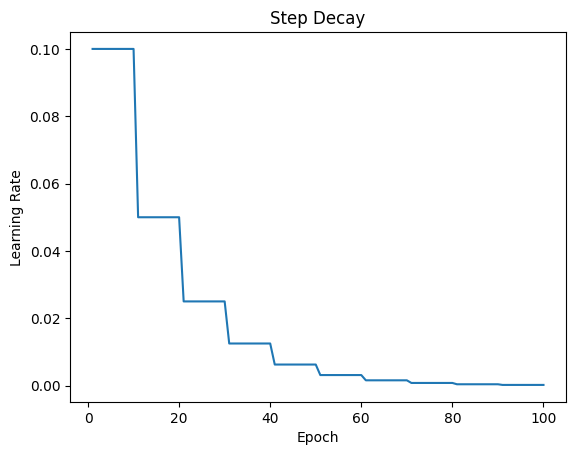

In [ ]:
learning_rates = []

for epoch in range(num_epochs):
    new_learning_rate = lr_scheduler.step_decay(epoch)
    print(f"Epoch: {epoch+1}, Learning Rate: {new_learning_rate}")
    
    learning_rates.append(new_learning_rate)
    
plt.plot(range(1, num_epochs + 1), learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Step Decay')
plt.show()

Epoch: 1, Learning Rate: 0.1
Epoch: 2, Learning Rate: 0.09090909090909091
Epoch: 3, Learning Rate: 0.08333333333333334
Epoch: 4, Learning Rate: 0.07692307692307693
Epoch: 5, Learning Rate: 0.07142857142857144
Epoch: 6, Learning Rate: 0.06666666666666667
Epoch: 7, Learning Rate: 0.0625
Epoch: 8, Learning Rate: 0.058823529411764705
Epoch: 9, Learning Rate: 0.05555555555555556
Epoch: 10, Learning Rate: 0.052631578947368425
Epoch: 11, Learning Rate: 0.05
Epoch: 12, Learning Rate: 0.047619047619047616
Epoch: 13, Learning Rate: 0.045454545454545456
Epoch: 14, Learning Rate: 0.04347826086956522
Epoch: 15, Learning Rate: 0.041666666666666664
Epoch: 16, Learning Rate: 0.04
Epoch: 17, Learning Rate: 0.038461538461538464
Epoch: 18, Learning Rate: 0.037037037037037035
Epoch: 19, Learning Rate: 0.03571428571428572
Epoch: 20, Learning Rate: 0.034482758620689655
Epoch: 21, Learning Rate: 0.03333333333333333
Epoch: 22, Learning Rate: 0.03225806451612903
Epoch: 23, Learning Rate: 0.03125
Epoch: 24, Lea

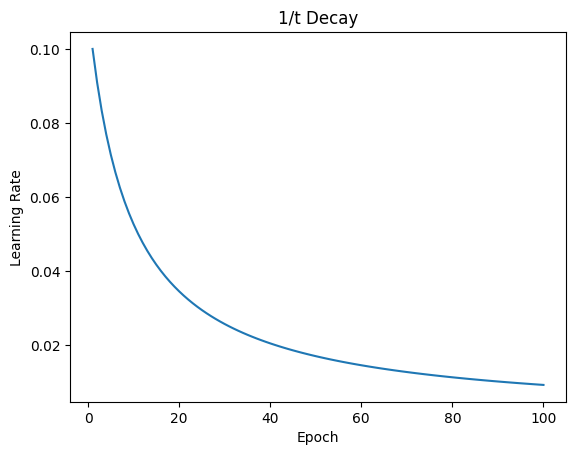

In [ ]:
learning_rates = []

for epoch in range(num_epochs):
    new_learning_rate = lr_scheduler.t_decay(epoch)
    print(f"Epoch: {epoch+1}, Learning Rate: {new_learning_rate}")
    
    learning_rates.append(new_learning_rate)
    
plt.plot(range(1, num_epochs + 1), learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('1/t Decay')
plt.show()

<h2 style='color:Fuchsia' align='center'>Implementing Batch Normalization from Scratch</h2>

<div style="text-align:center">
<img title="a title" alt="Batch Normalization" src="BatchNorm.PNG" width="600">
</div>

#### 
        During training we also keep an exponentially decaying running mean of the
        mean and variance of each feature, and these averages are used to normalize
        data at test-time.
        At each timestep we update the running averages for mean and variance using
        an exponential decay based on the momentum parameter
       

In [45]:
class BatchNorm:
    def batchnorm_forward(x, gamma, beta, Mode_Dictionary):

        mode = Mode_Dictionary['mode'] #-keys  mode: 'train' or 'test'; required
        eps = Mode_Dictionary.get('eps', 1e-5)
        momentum = Mode_Dictionary.get('momentum', 0.9)

        N, D = x.shape
        # running_mean: Array of shape (D,) giving running mean of features
        running_mean = Mode_Dictionary.get('running_mean', np.zeros(D, dtype=x.dtype))
        #- running_var Array of shape (D,) giving running variance of features
        running_var = Mode_Dictionary.get('running_var', np.zeros(D, dtype=x.dtype))

        if mode == 'train':
            sample_mean = x.mean(axis=0)
            sample_var = x.var(axis=0)
            
            running_mean = momentum * running_mean + (1 - momentum) * sample_mean
            running_var = momentum * running_var + (1 - momentum) * sample_var
            
            std = np.sqrt(sample_var + eps) #constant added for numeric stability
            x_centered = x - sample_mean
            x_norm = x_centered / std
            out = gamma * x_norm + beta #gamma: Scale parameter #beta: Shift paremeter
            
            cache = (x_norm, x_centered, std, gamma)
            
        elif mode == 'test':
            # mean μ and variance σ² for normalization at test-time are actually the running average of values we computed during training.
            x_norm = (x - running_mean) / np.sqrt(running_var + eps)
            out = out = gamma * x_norm + beta
        
        else:
            raise ValueError('Invalid forward batchnorm mode "%s"' % mode)

        # Store the updated running means back into bn_param
        Mode_Dictionary['running_mean'] = running_mean
        Mode_Dictionary['running_var'] = running_var

        return out, cache  #- cache: A tuple of values needed in the backward pass

In [46]:
def batchnorm_backward_alt(dout, cache):
    N = dout.shape[0]
    x_norm, x_centered, std, gamma = cache
    
    dgamma = (dout * x_norm).sum(axis=0)
    dbeta = dout.sum(axis=0)
    
    dx_norm = dout * gamma
    dx = 1/N / std * (N * dx_norm - 
                      dx_norm.sum(axis=0) - 
                      x_norm * (dx_norm * x_norm).sum(axis=0))    

    return dx, dgamma, dbeta